In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import signal
import pprint
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import time
import seaborn as sns
import matplotlib.cm as cm
import statsmodels as sm
import pickle

In [3]:
# weight_type = 'ff100'
weight_type = 'ons'

**Import data**

In [4]:
cases = pd.read_csv("data/GB/country/data_2022-Jun-24.csv", keep_default_na=False, na_values=[""])
cases = cases.drop(['areaType'], axis=1)
cases['date'] = pd.to_datetime(cases['date'].astype(str))
cases = cases.sort_values(by='date')
searches = pd.read_csv("data/GB/country/searches/processed.csv", keep_default_na=False,na_values=[""])
searches['date'] = pd.to_datetime(searches['date'].astype(str))
searches = searches.drop(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_1_code', 'sub_region_2', 'sub_region_2_code', 'place_id'], axis=1)
searches = searches.sort_values(by='date')
df = pd.merge(cases, searches, on='date', how='outer').iloc[::-1].sort_values(by='date')
# df.index = range(len(df))
df = df.set_index('date')
df

,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.58,0.22,0.39,3.31,0.40,2.61,0.37,0.17,0.54,0.32
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.53,0.22,0.43,3.53,0.39,2.81,0.40,0.15,0.57,0.35
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.58,0.23,0.43,3.50,0.42,2.90,0.43,0.17,0.56,0.35
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.51,0.23,0.41,3.22,0.41,3.00,0.40,0.17,0.48,0.33
2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.51,0.23,0.42,3.28,0.40,3.10,0.43,0.19,0.49,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.07,0.44,0.70,4.20,0.50,4.07,0.56,0.23,0.79,0.45
2022-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.08,0.44,0.71,4.11,0.49,3.58,0.56,0.21,0.69,0.49
2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.29,0.48,0.75,4.22,0.47,3.78,0.59,0.20,0.86,0.49


In [5]:
date = '2022-05-19'
df = df.loc[:date]
df['areaCode'] = df['areaCode'].fillna(df['areaCode'].iloc[-1])
df['areaName'] = df['areaName'].fillna(df['areaName'].iloc[-1])
df

/var/folders/16/p0_pv93912d7zzx29sykqy800000gn/T/ipykernel_66852/2888749485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['areaCode'] = df['areaCode'].fillna(df['areaCode'].iloc[-1])
/var/folders/16/p0_pv93912d7zzx29sykqy800000gn/T/ipykernel_66852/2888749485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['areaName'] = df['areaName'].fillna(df['areaName'].iloc[-1])


,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.58,0.22,0.39,3.31,0.40,2.61,0.37,0.17,0.54,0.32
2019-01-02,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.53,0.22,0.43,3.53,0.39,2.81,0.40,0.15,0.57,0.35
2019-01-03,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.58,0.23,0.43,3.50,0.42,2.90,0.43,0.17,0.56,0.35
2019-01-04,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.51,0.23,0.41,3.22,0.41,3.00,0.40,0.17,0.48,0.33
2019-01-05,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.51,0.23,0.42,3.28,0.40,3.10,0.43,0.19,0.49,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,United Kingdom,K02000001,173.0,22181462.0,7943.0,22207616.0,6659.0,21024430.0,1284.0,1183186.0,...,2.28,0.56,0.75,4.55,0.49,4.39,0.69,0.24,0.89,0.46
2022-05-16,United Kingdom,K02000001,22337.0,22203799.0,9391.0,22217007.0,7719.0,21032149.0,1672.0,1184858.0,...,2.32,0.54,0.77,4.39,0.50,3.67,0.61,0.22,0.94,0.50
2022-05-17,United Kingdom,K02000001,8603.0,22212395.0,8262.0,22225269.0,6879.0,21039028.0,1383.0,1186241.0,...,2.28,0.57,0.77,4.41,0.47,3.61,0.58,0.21,1.12,0.46


**Zero padding**

In [6]:
column = df.columns.get_loc('areaCode')+1
df.iloc[:, column:]= df.iloc[:, column:].fillna(0)
df

/var/folders/16/p0_pv93912d7zzx29sykqy800000gn/T/ipykernel_66852/1993940853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, column:]= df.iloc[:, column:].fillna(0)


,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.58,0.22,0.39,3.31,0.40,2.61,0.37,0.17,0.54,0.32
2019-01-02,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.53,0.22,0.43,3.53,0.39,2.81,0.40,0.15,0.57,0.35
2019-01-03,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.58,0.23,0.43,3.50,0.42,2.90,0.43,0.17,0.56,0.35
2019-01-04,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.51,0.23,0.41,3.22,0.41,3.00,0.40,0.17,0.48,0.33
2019-01-05,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.51,0.23,0.42,3.28,0.40,3.10,0.43,0.19,0.49,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,United Kingdom,K02000001,173.0,22181462.0,7943.0,22207616.0,6659.0,21024430.0,1284.0,1183186.0,...,2.28,0.56,0.75,4.55,0.49,4.39,0.69,0.24,0.89,0.46
2022-05-16,United Kingdom,K02000001,22337.0,22203799.0,9391.0,22217007.0,7719.0,21032149.0,1672.0,1184858.0,...,2.32,0.54,0.77,4.39,0.50,3.67,0.61,0.22,0.94,0.50
2022-05-17,United Kingdom,K02000001,8603.0,22212395.0,8262.0,22225269.0,6879.0,21039028.0,1383.0,1186241.0,...,2.28,0.57,0.77,4.41,0.47,3.61,0.58,0.21,1.12,0.46


**Symptom categories**

In [8]:
if weight_type == 'ff100':
    symptoms = ["Anosmia", "Arthralgia", "Clouding of consciousness", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache", "Myalgia", 
            "Nausea", "Nosebleed", "Rhinitis", "Shortness of breath", "Skin rash", "Sore throat", "Vomiting",] 
    
elif weight_type == 'ons':
    # symptoms = ["Abdominal pain",  "Ageusia", "Anosmia", "Chills", "Cluster headache", "Cough", "Diarrhea", "Dysgeusia", 
    #             "Fatigue", "Fever", "Headache", "Low-grade fever", "Myalgia", "Nausea", "Rhinitis", "Shallow breathing", "Shortness of breath", 
    #             "Sore throat", "Throat irritation", "Vomiting", ] 
#     symptoms = ["Abdominal pain",  "Ageusia", "Anosmia", "Chills", "Cluster headache", "Cough", "Diarrhea", "Dysgeusia", 
#                 "Fatigue", "Fever", "Headache", "Low-grade fever", "Myalgia", "Nausea", "Rhinitis", "Shallow breathing", "Shortness of breath", 
#                 "Sore throat", "Throat irritation", "Vomiting", "Weakness", ] 
#     symptoms = ["Ageusia", "Anosmia", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache",  "Myalgia", "Nausea", "Rhinitis", 
#                 "Shortness of breath", "Sore throat", "Vomiting", ] 
#     symptoms = ["Ageusia", "Anosmia", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache",  "Myalgia", "Nausea", 
#                 "Shortness of breath", "Sore throat", "Vomiting", ] 
    symptoms = ["Abdominal pain",  "Ageusia", "Anosmia", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache", "Myalgia", "Nausea", 
                "Shortness of breath", "Sore throat", "Vomiting", "Weakness", ] 
#     symptoms = ["Ageusia", "Anosmia", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache",  "Myalgia", "Nausea", 
#                 "Shortness of breath", "Sore throat", ] 
symptoms = ['symptom:' + s for s in symptoms]

In [9]:
column = df.columns.get_loc('symptom:Abdominal obesity')
df = pd.concat([df.iloc[:, :column], df[symptoms]], axis=1)
df

,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,symptom:Diarrhea,symptom:Fatigue,symptom:Fever,symptom:Headache,symptom:Myalgia,symptom:Nausea,symptom:Shortness of breath,symptom:Sore throat,symptom:Vomiting,symptom:Weakness
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.69,5.72,3.95,4.80,0.59,2.33,0.82,3.03,4.36,0.39
2019-01-02,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.89,6.09,4.06,4.19,0.61,2.10,0.86,3.10,3.84,0.43
2019-01-03,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.91,6.35,4.19,4.35,0.66,2.06,0.88,3.17,3.89,0.43
2019-01-04,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.50,6.02,4.07,4.25,0.66,1.96,0.81,3.02,3.57,0.41
2019-01-05,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.33,6.00,3.97,4.52,0.64,1.98,0.81,2.86,3.41,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,United Kingdom,K02000001,173.0,22181462.0,7943.0,22207616.0,6659.0,21024430.0,1284.0,1183186.0,...,7.57,8.58,5.77,5.86,0.86,3.09,1.22,3.44,5.16,0.75
2022-05-16,United Kingdom,K02000001,22337.0,22203799.0,9391.0,22217007.0,7719.0,21032149.0,1672.0,1184858.0,...,7.32,9.13,6.11,5.64,0.89,2.95,1.32,3.65,5.11,0.77
2022-05-17,United Kingdom,K02000001,8603.0,22212395.0,8262.0,22225269.0,6879.0,21039028.0,1383.0,1186241.0,...,7.12,8.80,6.11,5.44,0.84,2.77,1.28,3.41,4.51,0.77


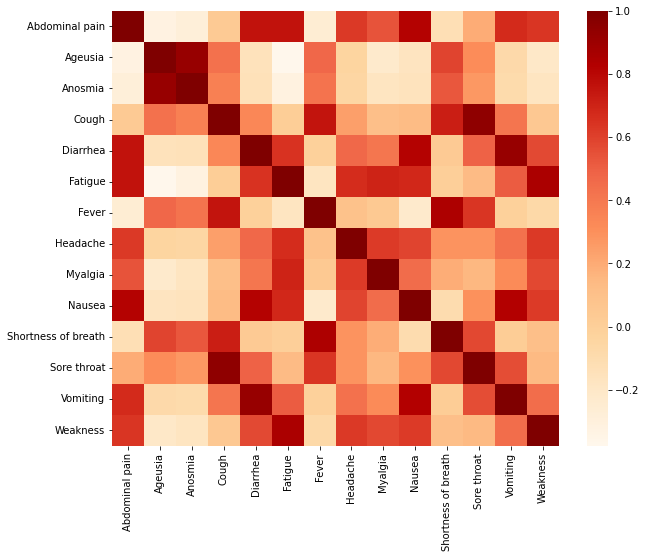

In [41]:
idx = df.columns.get_loc('cumAdmissions')+1
symptoms = [s.replace('symptom:', '') for s in list(df.columns[idx:])]
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(np.corrcoef(df.loc['2020-02-13':,:].iloc[:,idx:].T), index=symptoms, columns=symptoms), cmap='OrRd')
plt.savefig('images/country/heat_map.pdf')

**Symptoms classes**

In [287]:
symptom_class = {}
if weight_type == 'ff100':
    classes = ["Loss of the sense of smell", "Joint ache", "Altered consciousness", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache", 
           "Muscle ache", "Nausea", "Nose bleed", "Runny nose", "Shortness of breath", "Rash", "Sore throat", "Vomiting", ] 

elif weight_type == 'ons':
    # classes = ["Abdominal pain",  "Loss of taste",  "Loss of smell",  "Fatigue weakness",  "Headache", "Cough", "Diarrhea", 
    #             "Loss of taste", "Fatigue weakness", "Fever", "Headache", "Fever", "Muscle ache myalgia", 
    #             "Nausea vomiting", "Runny nose", "Shortness of breath", "Shortness of breath", "Sore throat", "Sore throat", 
    #              "Nausea vomiting", ] 
#     classes = ["Abdominal pain",  "Loss of taste",  "Loss of smell",  "Fatigue weakness",  "Headache", "Cough", "Diarrhea", 
#                 "Loss of taste", "Fatigue weakness", "Fever", "Headache", "Fever", "Muscle ache myalgia", 
#                 "Nausea vomiting", "Runny nose", "Shortness of breath", "Shortness of breath", "Sore throat", "Sore throat", 
#                  "Nausea vomiting", "Fatigue weakness", ] 
#     classes = ["Loss of taste", "Loss of smell", "Cough", "Diarrhea", "Fatigue weakness", "Fever", "Headache", "Muscle ache myalgia", 
#                "Nausea vomiting", "Runny nose", "Shortness of breath", "Sore throat", "Nausea vomiting",  ] 
#     classes = ["Loss of taste", "Loss of smell", "Cough", "Diarrhea", "Fatigue weakness", "Fever", "Headache", "Muscle ache myalgia", 
#                "Nausea vomiting", "Shortness of breath", "Sore throat", "Nausea vomiting",  ] 
    classes = ["Abdominal pain",  "Loss of taste", "Loss of smell", "Cough", "Diarrhea", "Fatigue weakness", "Fever", "Headache", 
               "Muscle ache myalgia", "Nausea vomiting", "Shortness of breath", "Sore throat", "Nausea vomiting",  "Fatigue weakness", ] 
#     classes = ["Loss of taste", "Loss of smell", "Cough", "Diarrhea", "Fatigue weakness", "Fever", "Headache", "Muscle ache myalgia", 
#                "Nausea vomiting", "Shortness of breath", "Sore throat",  ] 
for s, c in zip(symptoms, classes):
    symptom_class[s] = c
symptom_class 

{'symptom:Abdominal pain': 'Abdominal pain',
 'symptom:Ageusia': 'Loss of taste',
 'symptom:Anosmia': 'Loss of smell',
 'symptom:Cough': 'Cough',
 'symptom:Diarrhea': 'Diarrhea',
 'symptom:Fatigue': 'Fatigue weakness',
 'symptom:Fever': 'Fever',
 'symptom:Headache': 'Headache',
 'symptom:Myalgia': 'Muscle ache myalgia',
 'symptom:Nausea': 'Nausea vomiting',
 'symptom:Shortness of breath': 'Shortness of breath',
 'symptom:Sore throat': 'Sore throat',
 'symptom:Vomiting': 'Nausea vomiting',
 'symptom:Weakness': 'Fatigue weakness'}

**Aggregation of search frequency by symptom class**

In [288]:
df_copy = df.copy()
column = df.columns.get_loc(symptoms[0])
df = df.iloc[:, :column]
class_set = list(set(classes))

for c in class_set:
    df = pd.concat([df, pd.Series(np.zeros(len(df)), index=df.index, name=c)], axis=1)

for c in class_set:
    for s in symptoms:
        if symptom_class[s] == c:
            df[c] = df[c] + df_copy[s]

In [289]:
def harmonic_mean(arr):
    arr = arr[::-1]
    n = len(arr)
    denominator = 0
    for i in range(1, n+1):
        denominator += 1/i
    numerator = 0
    for x, p in zip(arr, range(1, n+1)):
        numerator += x/p
    return numerator/denominator

**Moving average**

In [290]:
column = df.columns.get_loc('areaCode')+1
# column = df.columns.get_loc('cumAdmissions')+1
index = df.index
columns = df.columns

df = pd.concat([df.iloc[:, :column], pd.DataFrame(df.iloc[:, column:].rolling(7).mean(), index=index, columns=columns[column:])], axis=1)
# df = pd.concat([df.iloc[:, :column], pd.DataFrame(df.iloc[:, column:].rolling(7).apply(stats.hmean), index=index, columns=columns[column:])], axis=1)
# df = pd.concat([df.iloc[:, :column], pd.DataFrame(df.iloc[:, column:].rolling(7).apply(harmonic_mean), index=index, columns=columns[column:])], axis=1)
# df = df.dropna(how='any')
df

,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,Shortness of breath,Headache,Fever,Cough,Muscle ache myalgia,Fatigue weakness,Loss of taste,Sore throat,Abdominal pain,Nausea vomiting
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,United Kingdom,K02000001,9605.571429,2.216663e+07,8234.571429,2.218537e+07,6905.285714,2.100572e+07,1329.285714,1.179655e+06,...,1.244286,5.464286,5.351429,6.817143,0.878571,9.164286,0.084286,3.271429,8.858571,7.405714
2022-05-16,United Kingdom,K02000001,9042.285714,2.217570e+07,8050.571429,2.219342e+07,6738.571429,2.101246e+07,1312.000000,1.180967e+06,...,1.211429,5.460000,5.395714,6.832857,0.875714,9.191429,0.085714,3.292857,8.792857,7.441429
2022-05-17,United Kingdom,K02000001,8783.714286,2.218451e+07,7843.428571,2.220127e+07,6563.285714,2.101902e+07,1280.142857,1.182247e+06,...,1.202857,5.457143,5.471429,6.805714,0.870000,9.158571,0.084286,3.295714,8.350000,7.440000


**Import symptom weight**

In [293]:
symptom_weights={}
column = df.columns.get_loc(class_set[0])

if weight_type == 'ff100':
    weights = {'Fatigue':0.709, 'Fever':0.601, 'Loss of the sense of smell':0.291, 'Nausea':0.236, 'Shortness of breath':0.404,
                   'Diarrhea':0.276, 'Muscle ache':0.509, 'Runny nose':0.325, 'Vomiting':0.087,  'Rash': 0.052,
                   'Cough':0.777, 'Nose bleed':0.06, 'Headache':0.567,  'Sore throat':0.386, 'Joint ache':0.339, 'Altered consciousness':0.068,}
    for s in df.columns[column:]:
        symptom_weights[s] = weights[s] 
    
elif weight_type == 'ons':
    weights = pd.read_excel('data/symptoms/datadownload.xlsx', sheet_name=1, index_col=None).drop(['No reported symptoms'], axis=1) 
    weights = pd.concat([weights, pd.Series([.325*100], index=weights.index, name='Runny nose')], axis=1)
    for s in df.columns[column:]:
        if s == 'Runny nose':
            symptom_weights[s] = .325*100
        elif s=='Joint ache':
            symptom_weights[s] = .339*100
        else:
            symptom_weights[s] = weights[s].values[0]

symptom_weights

{'Loss of smell': 18.004117647058823,
 'Diarrhea': 6.815294117647059,
 'Shortness of breath': 14.321764705882355,
 'Headache': 37.633529411764705,
 'Fever': 24.42941176470588,
 'Cough': 41.81411764705882,
 'Muscle ache myalgia': 25.725294117647056,
 'Fatigue weakness': 37.25352941176472,
 'Loss of taste': 18.753529411764706,
 'Sore throat': 32.065294117647056,
 'Abdominal pain': 7.315294117647059,
 'Nausea vomiting': 9.48470588235294}

**Derive search-score**

In [294]:
index = df.index
column = df.columns.get_loc(class_set[0])
#     score =pd.Series([np.average(a[column:], weights=list(symptom_weights.values())) for a in dfs[key].values], name='search_score')
score =pd.DataFrame([np.average(row[column:], weights=list(symptom_weights.values())) for row in df.values], 
                    index=index, columns=['search_score'])
df = pd.concat([df, score], axis=1)
df

,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,Headache,Fever,Cough,Muscle ache myalgia,Fatigue weakness,Loss of taste,Sore throat,Abdominal pain,Nausea vomiting,search_score
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,United Kingdom,K02000001,9605.571429,2.216663e+07,8234.571429,2.218537e+07,6905.285714,2.100572e+07,1329.285714,1.179655e+06,...,5.464286,5.351429,6.817143,0.878571,9.164286,0.084286,3.271429,8.858571,7.405714,4.732835
2022-05-16,United Kingdom,K02000001,9042.285714,2.217570e+07,8050.571429,2.219342e+07,6738.571429,2.101246e+07,1312.000000,1.180967e+06,...,5.460000,5.395714,6.832857,0.875714,9.191429,0.085714,3.292857,8.792857,7.441429,4.743123
2022-05-17,United Kingdom,K02000001,8783.714286,2.218451e+07,7843.428571,2.220127e+07,6563.285714,2.101902e+07,1280.142857,1.182247e+06,...,5.457143,5.471429,6.805714,0.870000,9.158571,0.084286,3.295714,8.350000,7.440000,4.729003


**Import media search data**

In [295]:
news = pd.read_csv('data/GB/news_UK.csv')
news['date'] = pd.to_datetime(news['date'].astype(str))
news = news.set_index('date')
news = news.rename(columns={'covid-news-ratio-UK': 'news'})
df = pd.merge(df, news, on='date')
df

,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,Fever,Cough,Muscle ache myalgia,Fatigue weakness,Loss of taste,Sore throat,Abdominal pain,Nausea vomiting,search_score,news
date,,,,,,,,,,,,,,,,,,,,,
2019-09-30,United Kingdom,K02000001,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,3.665714,6.220000,0.641429,6.687143,0.041429,2.447143,5.224286,5.252857,3.630901,0.000598
2019-10-01,United Kingdom,K02000001,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,3.641429,6.270000,0.642857,6.654286,0.041429,2.442857,5.224286,5.255714,3.632857,0.000571
2019-10-02,United Kingdom,K02000001,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,3.624286,6.315714,0.647143,6.595714,0.041429,2.454286,5.192857,5.241429,3.626618,0.000283
2019-10-03,United Kingdom,K02000001,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,3.641429,6.384286,0.645714,6.542857,0.041429,2.464286,5.165714,5.220000,3.625256,0.000842
2019-10-04,United Kingdom,K02000001,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,3.667143,6.470000,0.647143,6.564286,0.041429,2.482857,5.164286,5.278571,3.651726,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,United Kingdom,K02000001,9605.571429,2.216663e+07,8234.571429,2.218537e+07,6905.285714,2.100572e+07,1329.285714,1.179655e+06,...,5.351429,6.817143,0.878571,9.164286,0.084286,3.271429,8.858571,7.405714,4.732835,0.051887
2022-05-16,United Kingdom,K02000001,9042.285714,2.217570e+07,8050.571429,2.219342e+07,6738.571429,2.101246e+07,1312.000000,1.180967e+06,...,5.395714,6.832857,0.875714,9.191429,0.085714,3.292857,8.792857,7.441429,4.743123,0.025424
2022-05-17,United Kingdom,K02000001,8783.714286,2.218451e+07,7843.428571,2.220127e+07,6563.285714,2.101902e+07,1280.142857,1.182247e+06,...,5.471429,6.805714,0.870000,9.158571,0.084286,3.295714,8.350000,7.440000,4.729003,0.056035


In [296]:
def standardisation(df, mean=None, std=None, given=False):
    if given==False:
        mean = df.mean()
        std = df.std()
    return (df-mean)/std, mean, std

def standard_inverse(df, mean, std):
    return df*std+mean

In [297]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.preprocessing import StandardScaler

def compute_gamma(series, news, lags=2, n=56, standardise=True):
    series = pd.DataFrame(series.values, index=series.index, columns=['search_score'])
    y = series.iloc[lags:]
    x = pd.DataFrame(index=y.index, columns=[])
    for i in range(1, lags+1):
        x['ar_'+str(i)] = series.shift(i)[lags:]
    for i in range(0, lags+1):
        x['news_'+str(i)] = news.shift(i)[lags:]
    
    error1 = []
    error2 = []
    predictions_ar = []
    predictions_news = []
    gammas = {}
    gammas_process = {}
    for i in range(len(y)-n-1):
        if standardise==True:
            y_train, y_mean, y_std = standardisation(y.iloc[i:n+i])
            y_test, _, _ = standardisation(y.iloc[1+i:n+1+i], y_mean, y_std, given=True)
            x_train, x_mean, x_std = standardisation(x.iloc[i:n+i, :])
            x_test, _, _ = standardisation(x.iloc[1+i:n+1+i, :], x_mean, x_std, given=True)
            x_train = sm.add_constant(x_train)
            x_test = sm.add_constant(x_test)
        else:
            y_train = y.iloc[i:n+i]
            y_test = y.iloc[1+i:n+1+i]
            x_train = x.iloc[i:n+i, :]
            x_test = x.iloc[1+i:n+1+i, :]
            x_train = sm.add_constant(x_train)
            x_test = sm.add_constant(x_test)
        
        result_ar = sm.OLS(y_train, x_train.iloc[:, :lags+1]).fit()
        result_news = sm.OLS(y_train, x_train).fit()
        pred_ar = result_ar.predict(x_test.iloc[:, :lags+1])
        pred_news = result_news.predict(x_test)
        predictions_ar.append(pred_ar)
        predictions_news.append(pred_news)
    
        e1 = np.abs(y_test['search_score'].values - pred_ar).mean()
        e2 = np.abs(y_test['search_score'].values - pred_news).mean()     
        error1.append(e1)
        error2.append(e2)
        ratio = e2/e1
        gammas[y.index[n+i+1]] = ratio
        if ratio < 1:
            gammas_process[y.index[n+i+1]] = ratio
        else:
            gammas_process[y.index[n+i+1]] = 1.
        
    return gammas_process, gammas, error1, error2, predictions_ar, predictions_news

**Mitigation of media effect**

In [ ]:
gammas = compute_gamma(df['search_score'], df['news'], lags=3, n=90,  standardise=True)[0]
gammas = pd.DataFrame(gammas.values(), index=gammas.keys(), columns=['gamma'])
gammas.index.name = 'date'
gammas = gammas.rolling(7).mean().dropna()
# gammas = gammas.rolling(7).apply(stats.hmean).dropna()
# gammas = gammas.rolling(7).apply(harmonic_mean).dropna()
# gammas.to_csv('data/GB/media_gammas.csv')
df = pd.merge(df, gammas, on='date').dropna(how='any')
df['search_score_adj'] =  df['search_score']*df['gamma']
df = df.drop(columns=['news', 'gamma'])

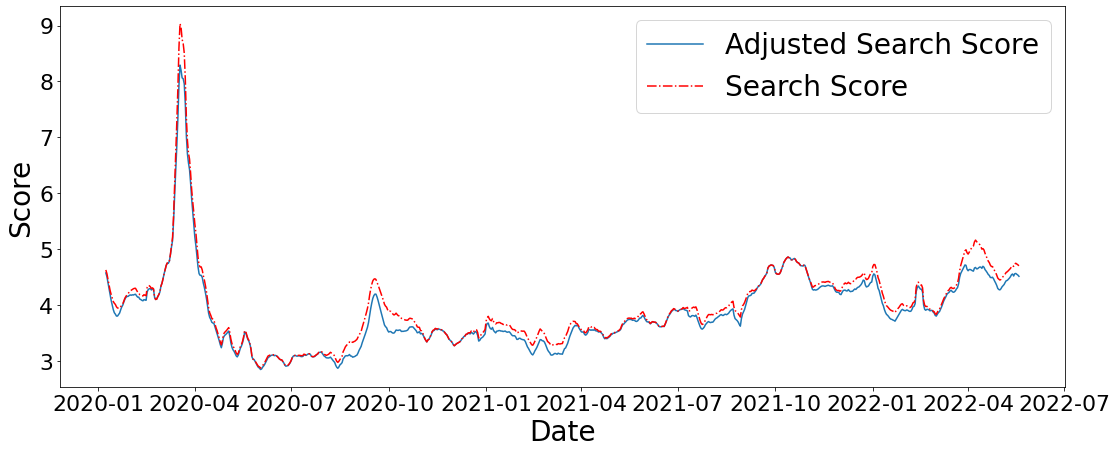

In [447]:
plt.figure(figsize=(18, 7))
plt.plot(df['search_score_adj'], label='Adjusted Search Score')
plt.plot(df['search_score'], color='red', ls='-.', label='Search Score')
plt.legend(fontsize=28)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel('Score', fontsize=28)
plt.xlabel('Date', fontsize=28)
plt.savefig('images/country/adjusted_score.pdf')

In [300]:
def correlation(df, metric='newCasesBySpecimenDate', data_range=None, shift=0):
    if data_range is not None:
        start = data_range[0]
        end = data_range[1]
    else:
        start = df.index[0]
        end = df.index[-1]
    
    correl = {}
    for i in range(df.columns.get_loc(class_set[0]), len(df.columns)):
        clinical = df[metric].shift(shift).loc[start:end].dropna()
        correl[df.columns[i]] = np.corrcoef(clinical, df[df.columns[i]].loc[clinical.index[0]:clinical.index[-1]])[0][1]
    
    return correl

In [301]:
def correl_series(df, metric='newCasesBySpecimenDate', data_range=None, shift_range=(-30, 30)):
    days = np.arange(shift_range[0], shift_range[1]+1)
    for i, d in enumerate(days):
        if i == 0:
            correl = correlation(df, metric=metric, data_range=data_range, shift=d)
            matrix = pd.DataFrame(np.round(list(correl.values()),decimals=3), index=correl.keys(), columns=[d])
        else:
            correl = correlation(df, metric=metric, data_range=data_range, shift=d)
            tmp = pd.DataFrame(np.round(list(correl.values()),decimals=3), index=correl.keys(), columns=[d])
            matrix = pd.concat([matrix, tmp], axis=1)
    
    return matrix

In [440]:
def dipict_correl_series(df, metric='newCasesBySpecimenDate', start='2020-01-01', end='2022-05-18', 
                         shift_range=(-30, 30), score='search_score', figsize=(18,9)):
    plt.figure(figsize=figsize) 
    matrix = correl_series(df, metric=metric, data_range=(start, end), shift_range=shift_range)
    print('Correlation of {} from {} to {}:'.format(metric, start, end))
    print('  ', 0, ':', matrix.loc[score, 0])
    print('  ', list(matrix.loc[score]).index(matrix.loc[score].max())-(shift_range[0]*-1), ':', matrix.loc[score].max())
    plt.plot(matrix.iloc[:-3].T)
    plt.plot(matrix.iloc[-3].T, color=(0.1, 0.2, 0.5))
    plt.plot(matrix.iloc[-1].T, color='black', lw=4)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.axvline(0, ymin=0, ymax=1, color='black', linestyle='--', label='')
    matrix = matrix.drop('search_score', axis=0)
    max_values = []
    max_shifts = []
    for s in matrix.index:
        max_values.append(matrix.loc[s].max())
        max_shifts.append(list(matrix.loc[s]).index(matrix.loc[s].max())-(shift_range[0]*-1))
    plt.scatter(max_shifts, max_values, marker='d', c='r', s=100)
    legend = list(matrix.index)[:-1]
    legend[-1] = 'Adj. search score'
    plt.legend(labels=legend, fontsize=22)
    plt.ylabel('Correlation', fontsize=28)
    plt.xlabel('Number of days the clinical data shifted', fontsize=28)
    plt.title('{} to {}'.format(start, end), fontsize=36)
    plt.savefig('figures/correl/{}_{}_{}_{}.pdf'.format(score, metric, start, end))
    return list(matrix.loc[score]).index(matrix.loc[score].max())-(shift_range[0]*-1)

In [438]:
def depict_series(df, metric='newCasesBySpecimenDate', start='2020-02-13', end='2022-05-18', shift=None, 
                  score='search_score', figsize=(18,9)):
    if metric == 'newCasesBySpecimenDate':
        m = 'New cases'
    elif metric == 'newDeaths28DaysByDeathDate':
        m = 'New deaths' 
    elif metric == 'newAdmissions':
        m = 'New admissions'
    
    start_idx  = df.index.get_loc(start)
    end_idx = df.index.get_loc(end)
    fig = plt.figure(figsize=figsize) 
    ax1 = fig.add_subplot(111)
    ln1 = ax1.plot(df.index[start_idx:end_idx], df[score].iloc[start_idx:end_idx], label='Search score')
    ax2 = ax1.twinx()
    ln2 = ax2.plot(df.index[start_idx:end_idx], df[metric].iloc[start_idx:end_idx], color='red', ls='--', label=m)
        
    if shift is not None:
        shifted = df[metric].shift(shift).iloc[start_idx:end_idx].dropna()
        start_shifted  = df.index.get_loc(shifted.index[0])
        end_shifted = df.index.get_loc(shifted.index[-1])+1
        ax2.plot(df.index[start_shifted:end_shifted], shifted, color='red', label=m+ '(shifted)')
    ax1.set_xlabel("Date", fontsize=28)
    ax1.set_ylabel("Search Score", fontsize=28)
    ax2.set_ylabel(m, fontsize=28)
    plt.title('{} to {}'.format(start, end), fontsize=36)
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, fontsize=28)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.savefig('figures/score/{}_{}_{}_{}.pdf'.format(score, metric, start, end))

newCasesBySpecimenDate
--------------------
Correlation of newCasesBySpecimenDate from 2020-02-13 to 2022-05-19:
   0 : 0.227
   -3 : 0.228
Correlation of newCasesBySpecimenDate from 2020-02-13 to 2020-06-30:
   0 : -0.191
   -35 : 0.835
Correlation of newCasesBySpecimenDate from 2020-07-01 to 2021-03-31:
   0 : 0.288
   -21 : 0.31
Correlation of newCasesBySpecimenDate from 2021-04-01 to 2022-05-19:
   0 : 0.349
   -2 : 0.351

newDeaths28DaysByDeathDate
--------------------
Correlation of newDeaths28DaysByDeathDate from 2020-02-13 to 2022-05-19:
   0 : -0.095
   -26 : 0.325
Correlation of newDeaths28DaysByDeathDate from 2020-02-13 to 2020-06-30:
   0 : -0.15
   -26 : 0.883
Correlation of newDeaths28DaysByDeathDate from 2020-07-01 to 2021-03-31:
   0 : 0.121
   -32 : 0.227
Correlation of newDeaths28DaysByDeathDate from 2021-04-01 to 2022-05-19:
   0 : 0.631
   -12 : 0.669

newAdmissions
--------------------
Correlation of newAdmissions from 2020-02-13 to 2022-05-19:
   0 : 0.065
   -19 

/var/folders/16/p0_pv93912d7zzx29sykqy800000gn/T/ipykernel_6567/127872428.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


Correlation of newAdmissions from 2020-07-01 to 2021-03-31:
   0 : 0.193
   -26 : 0.274
Correlation of newAdmissions from 2021-04-01 to 2022-05-19:
   0 : 0.598
   2 : 0.6



<Figure size 1296x648 with 0 Axes>

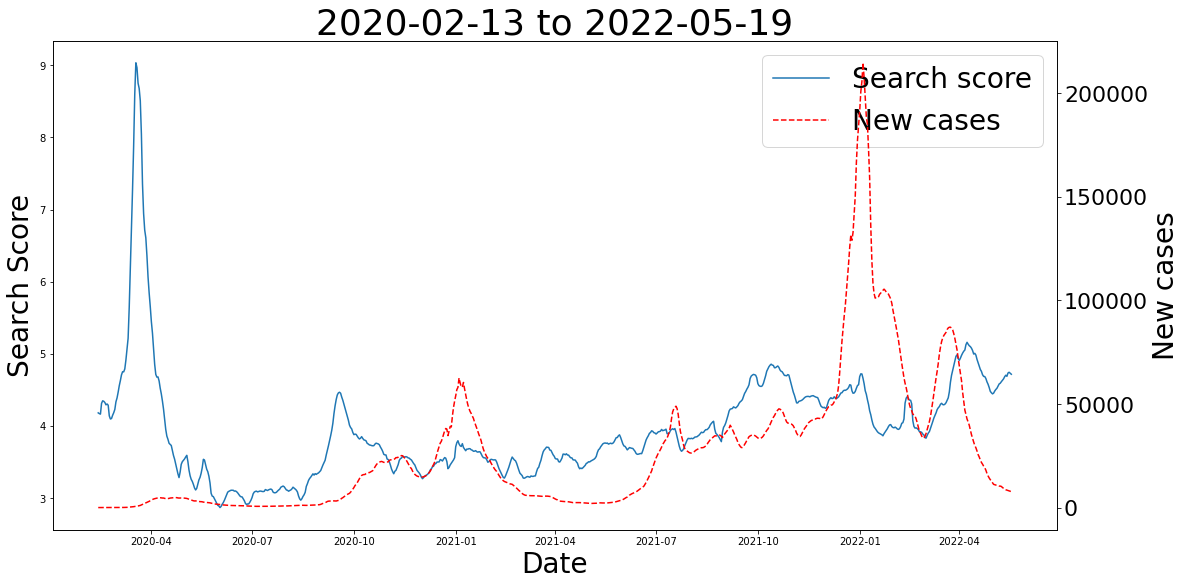

<Figure size 1296x648 with 0 Axes>

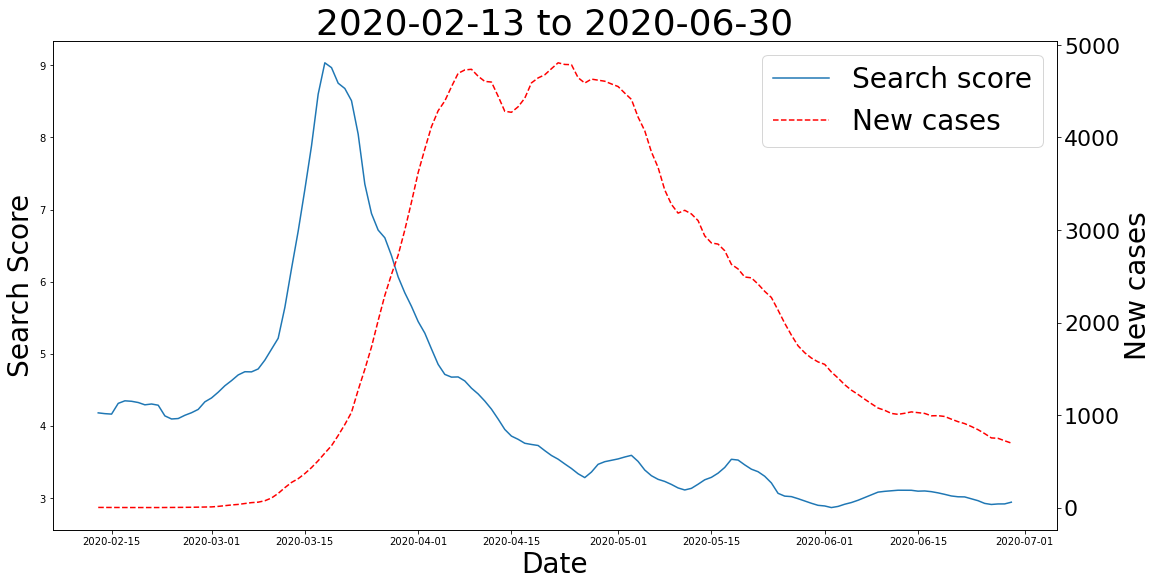

<Figure size 1296x648 with 0 Axes>

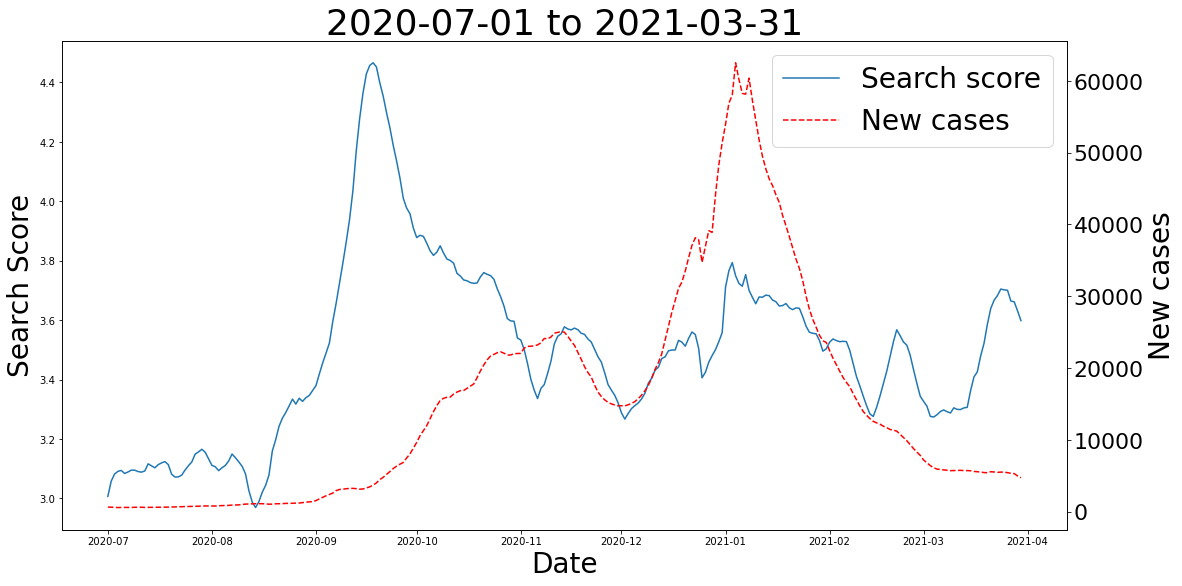

<Figure size 1296x648 with 0 Axes>

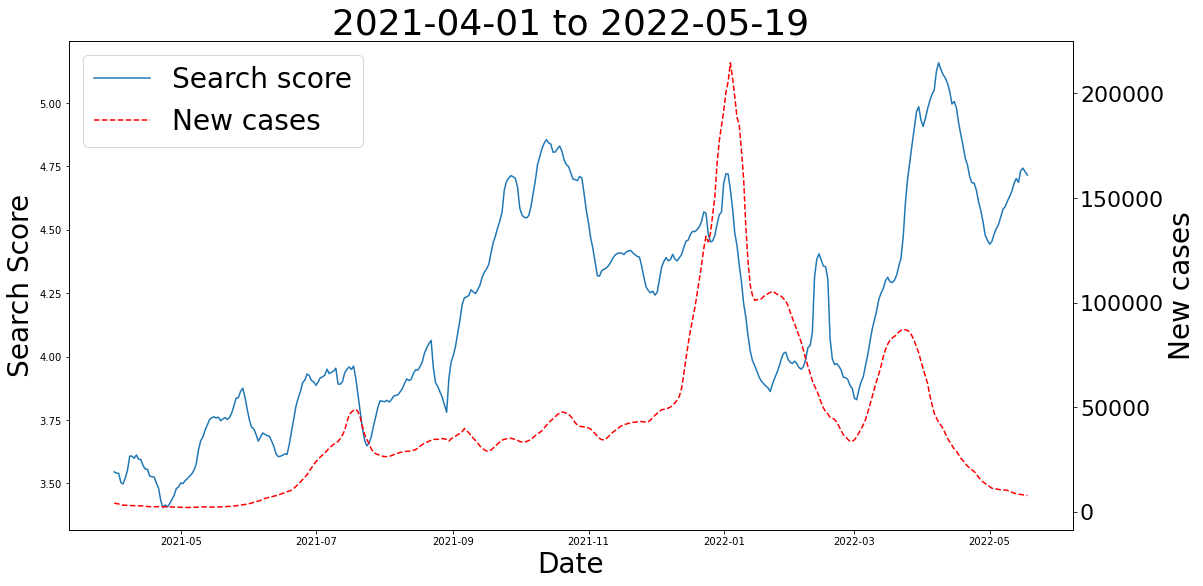

<Figure size 1296x648 with 0 Axes>

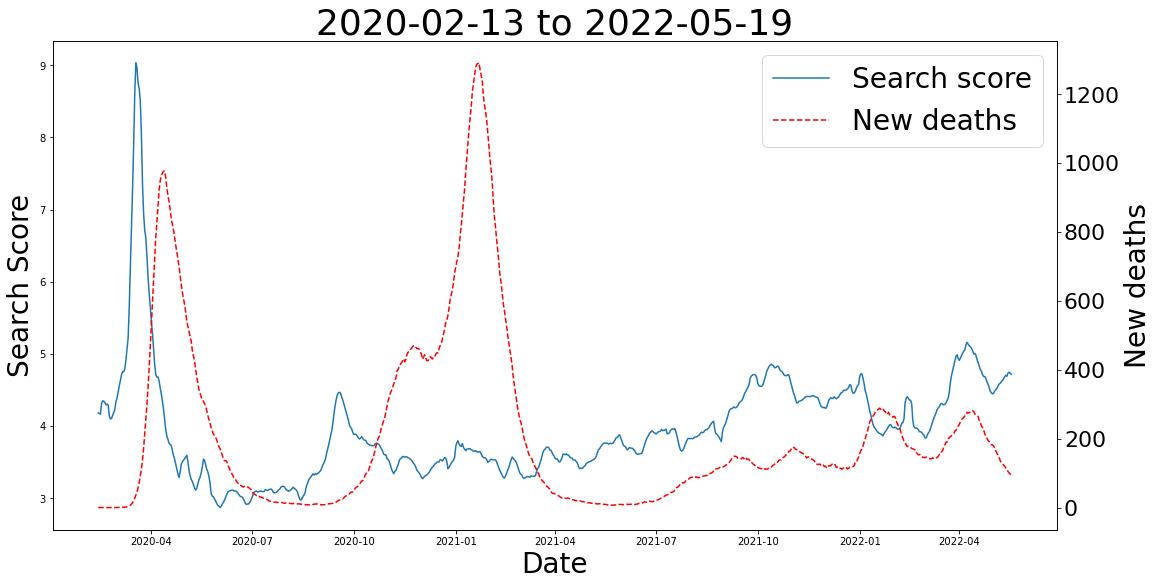

<Figure size 1296x648 with 0 Axes>

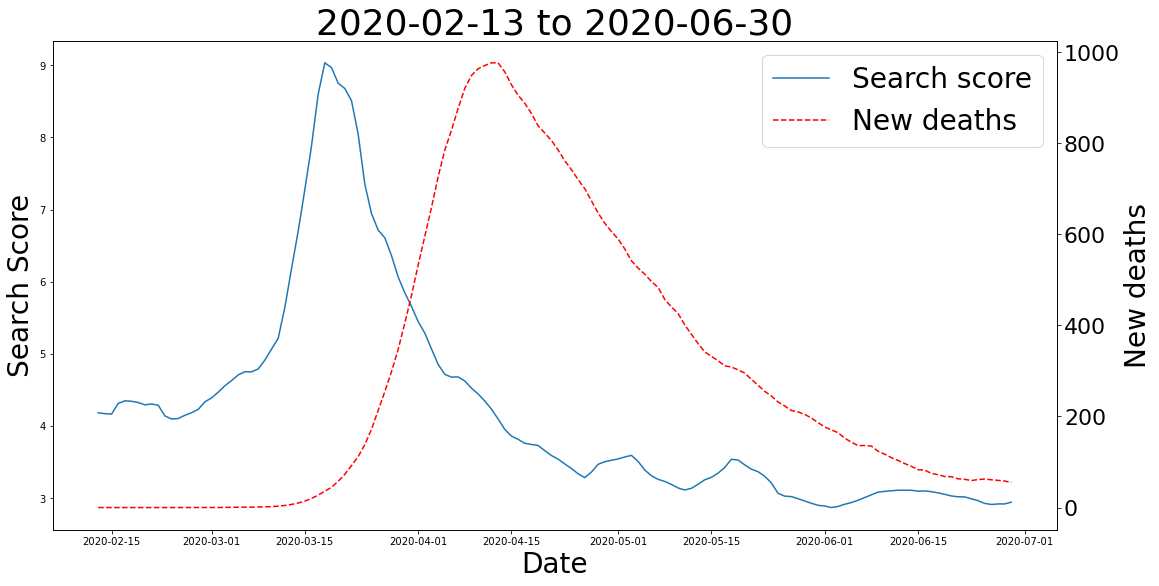

<Figure size 1296x648 with 0 Axes>

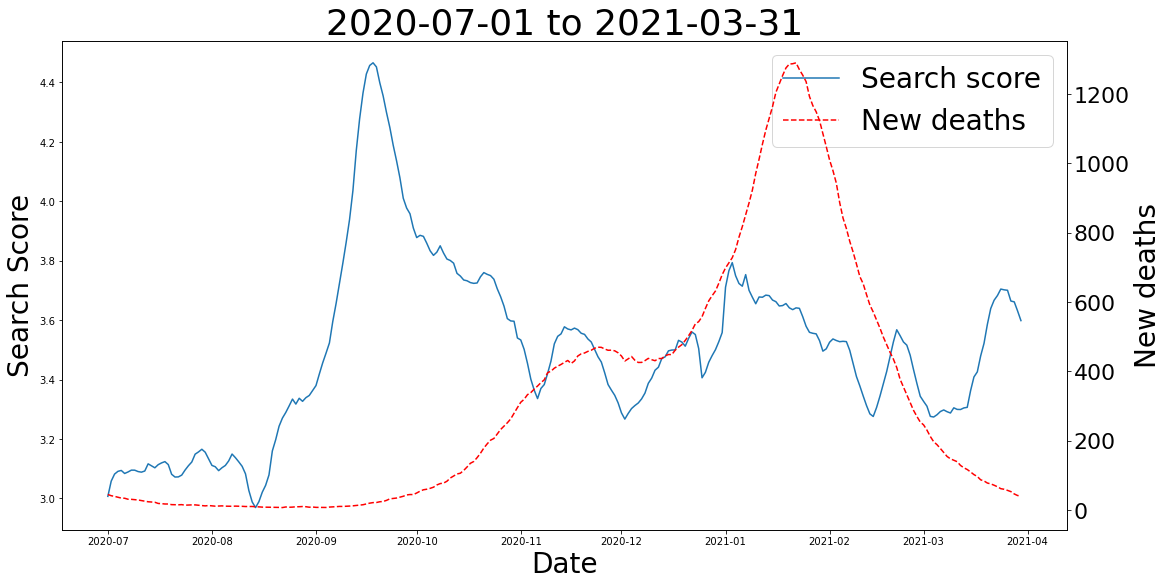

<Figure size 1296x648 with 0 Axes>

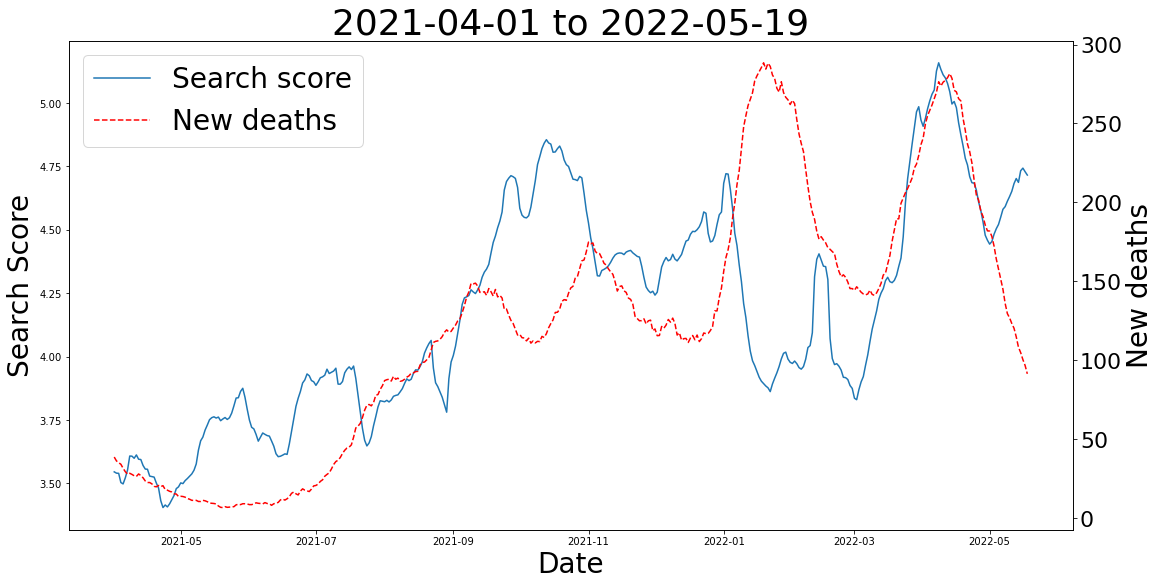

<Figure size 1296x648 with 0 Axes>

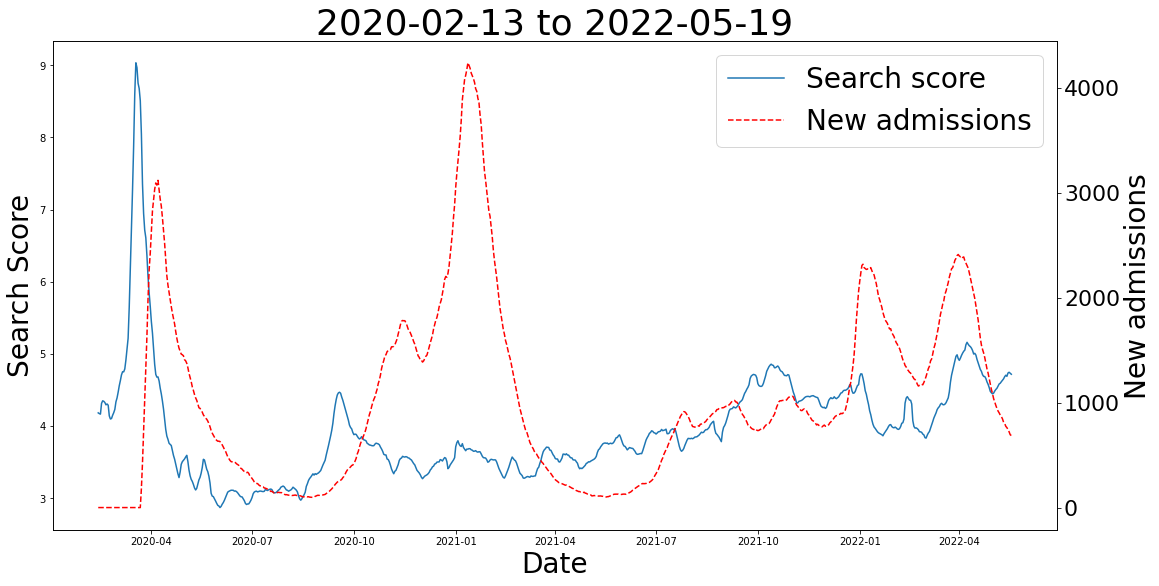

<Figure size 1296x648 with 0 Axes>

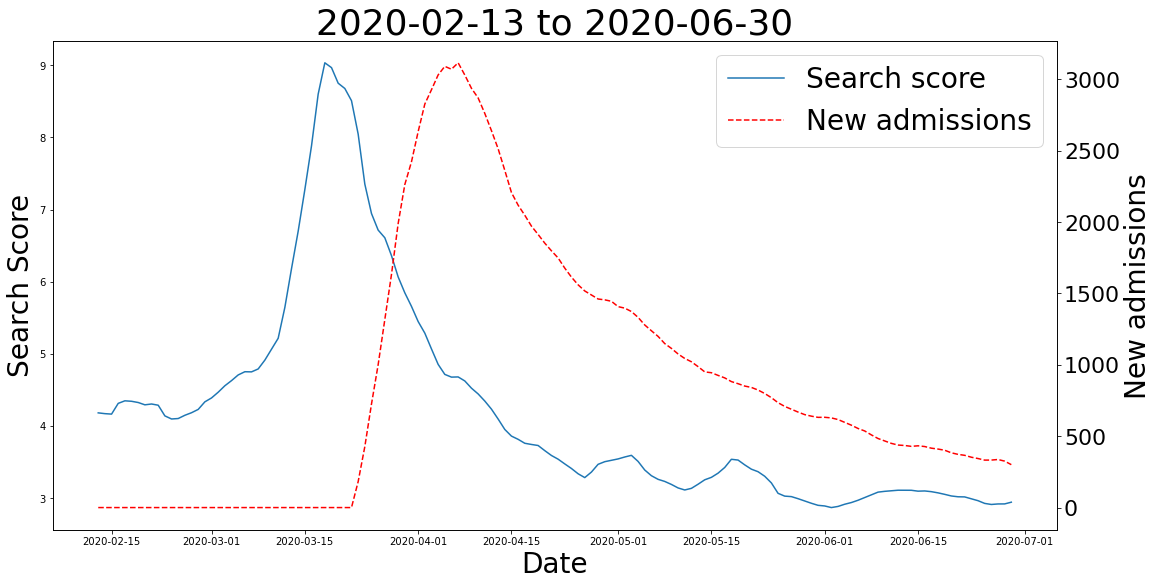

<Figure size 1296x648 with 0 Axes>

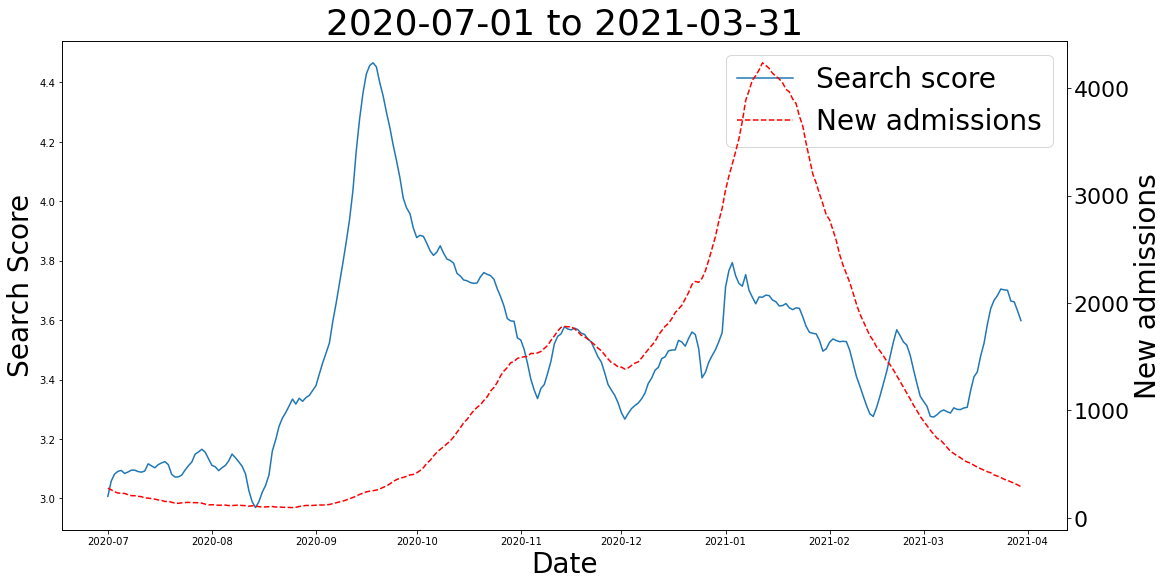

<Figure size 1296x648 with 0 Axes>

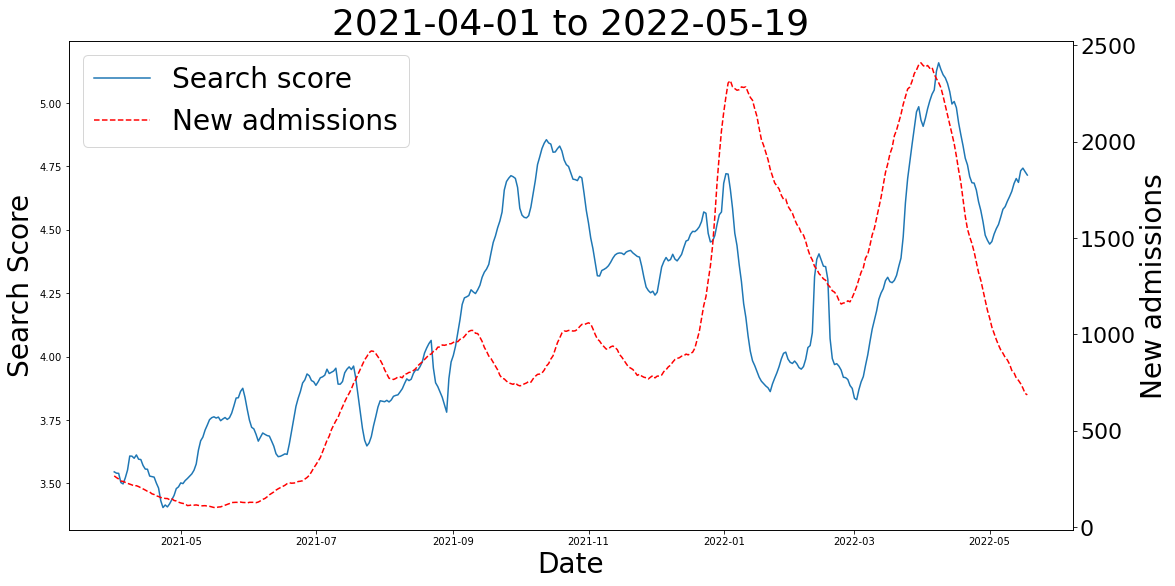

In [439]:
p = ['2020-02-13', '2022-05-19']
p1 = ['2020-02-13', '2020-06-30']
p2 = ['2020-07-01', '2021-03-31']
# p3 = ['2020-02-13', '2021-03-31']
# p4 = ['2020-07-16', '2022-05-19']
p5 = ['2021-04-01', '2022-05-19']
periods = [p, p1, p2, p5]
metrics = ['newCasesBySpecimenDate', 'newDeaths28DaysByDeathDate', 'newAdmissions']

score = 'search_score'
# score = 'search_score_adj'

for m in metrics:
    print(m)
    print('-'*20, )
    for p in periods:
        shift_days = dipict_correl_series(df, m, p[0], p[1], shift_range=(-40, 10), score=score)
        depict_series(df, m, p[0], p[1], shift=shift_days, score=score)
    print('')